In [2]:
import torch
from torchvision import datasets, transforms

transoform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transoform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transoform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle = False)



In [3]:
import torch.nn as nn
import torch.nn.functional as f

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        x = f.relu(self.conv1(x))
        x = f.max_pool2d(x, 2)
        
        x = f.relu(self.conv2(x))
        x = f.max_pool2d(x, 2)

        x = x.view(-1, 7 * 7 * 64)

        x = f.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

model = CNNModel()


In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [14]:
def train(model, train_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            out = model(data)
            loss = criterion(out, target)
            loss.backward()
            optimizer.step()
            
            
train(model, train_loader, criterion, optimizer, 5)


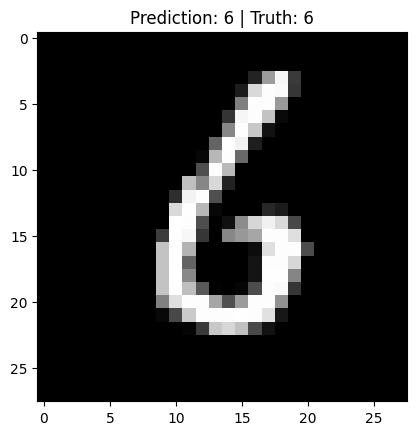

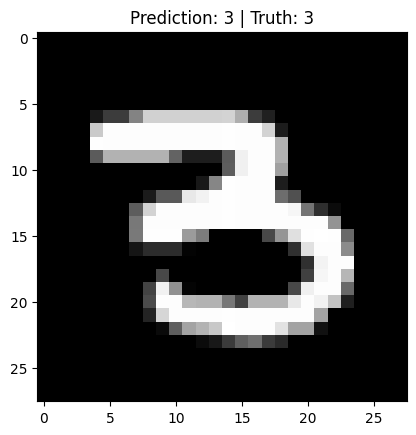

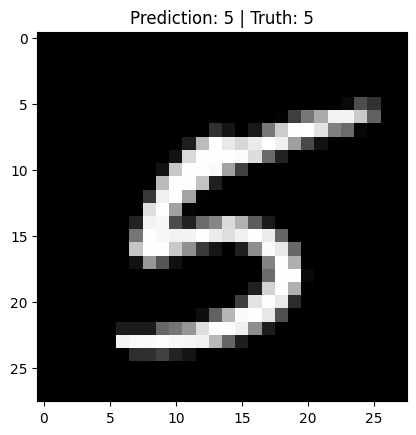

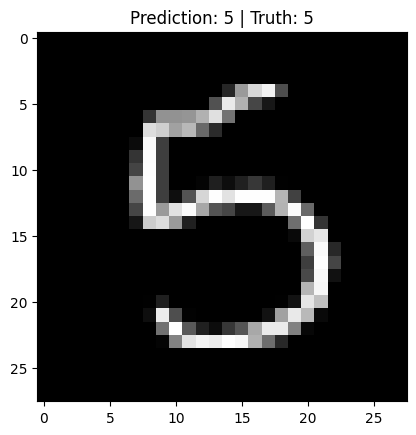

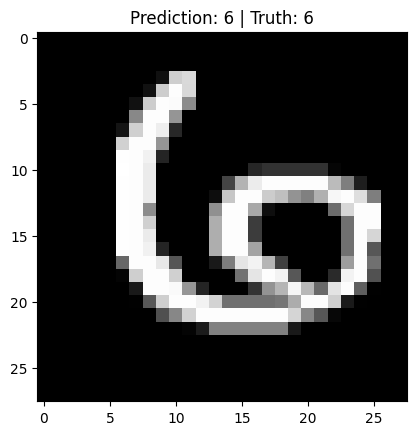

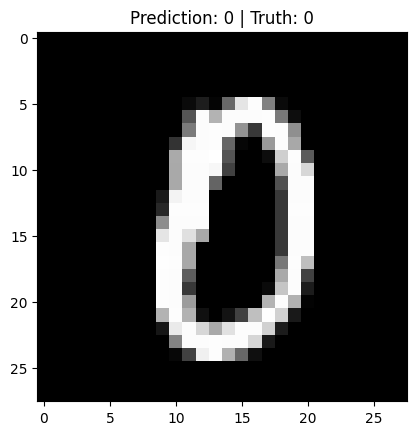

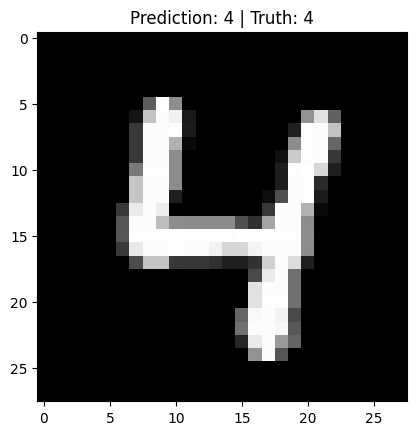

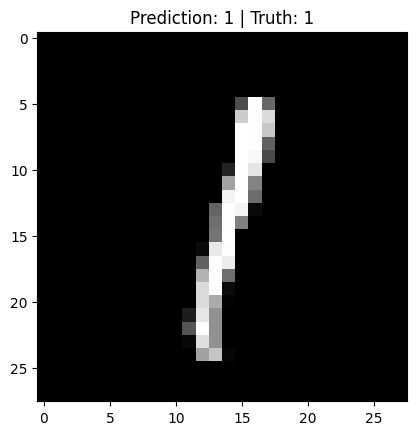

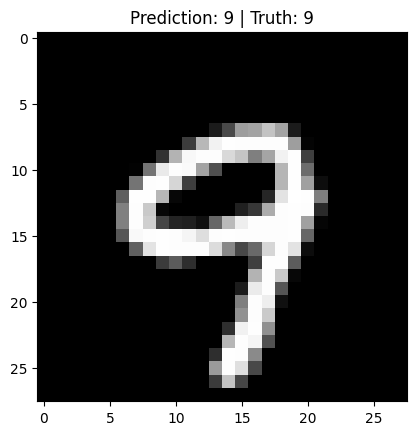

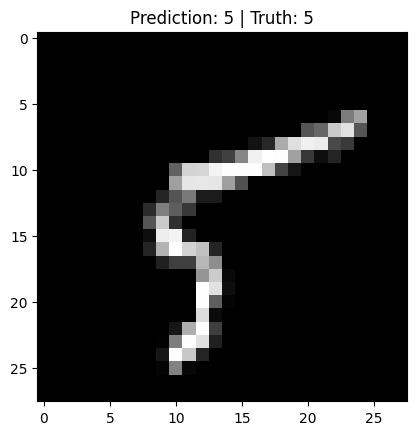

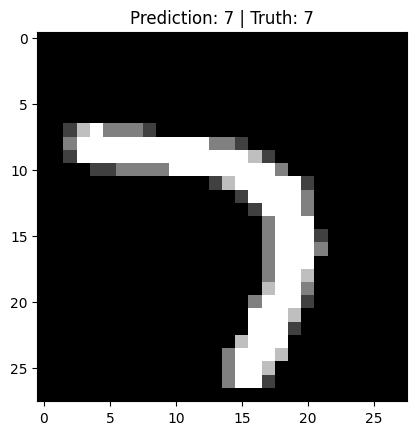

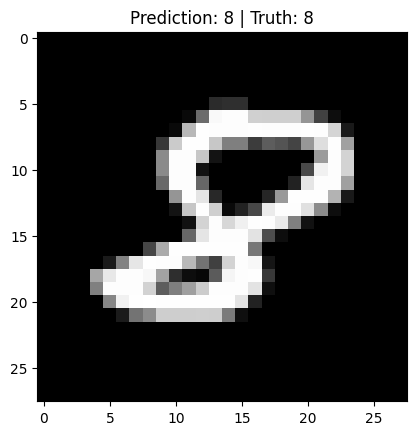

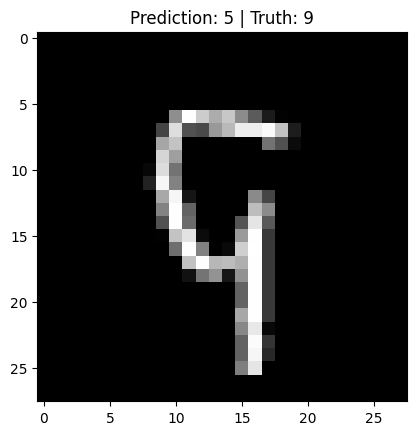

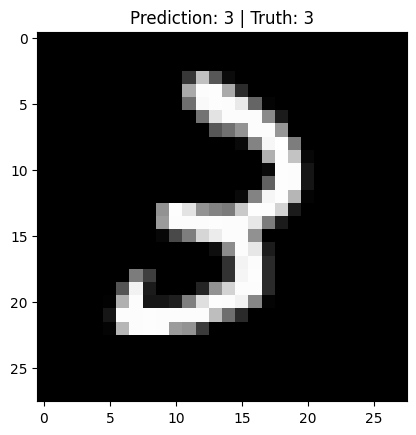

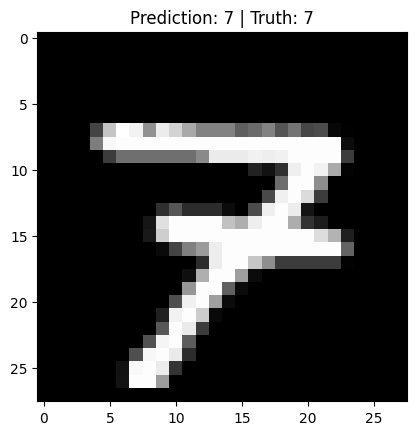

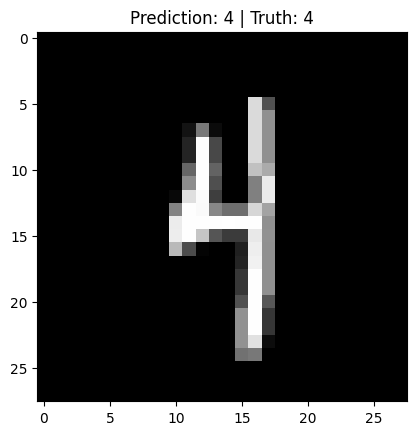

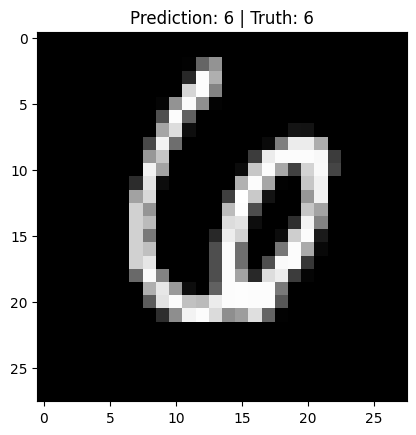

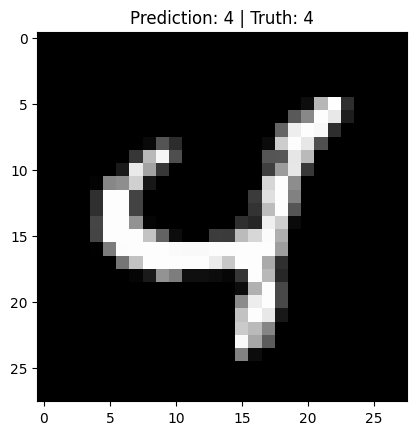

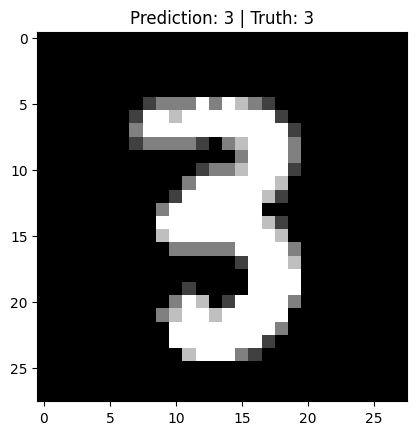

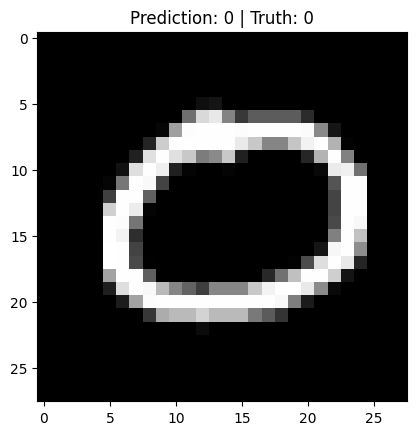

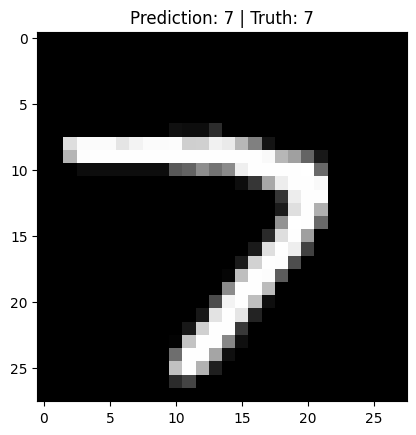

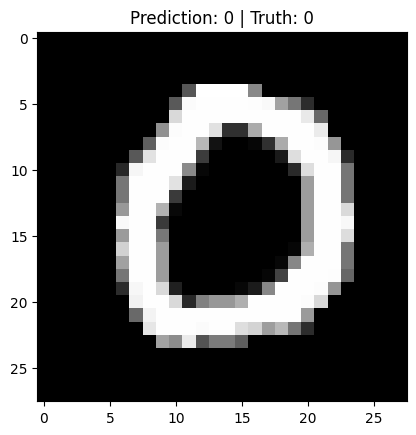

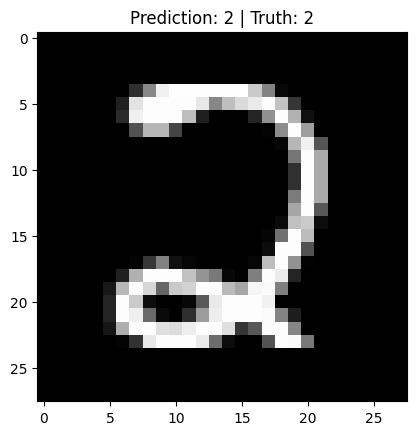

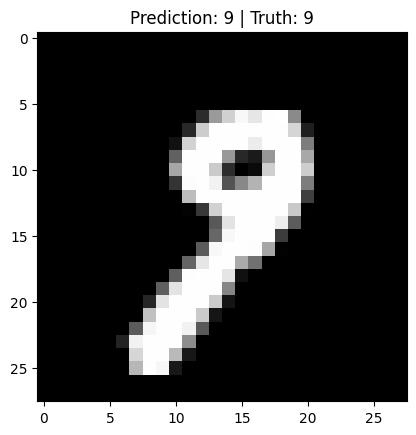

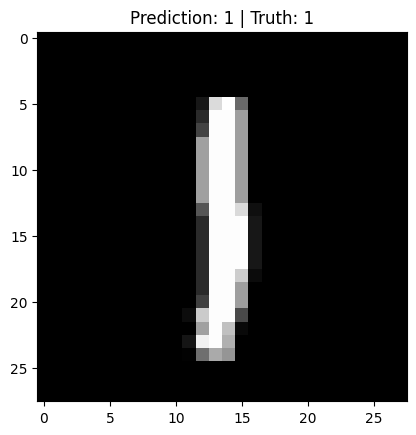

In [16]:
data_iter = iter(test_loader)
images, labels = next(data_iter)
import matplotlib.pyplot as plt
import numpy as np

model.eval()
with torch.no_grad():
    for i in range(50, 75):
        img = images[i].unsqueeze(0)
        true_label = labels[i].item()
        out = model(img)
        predict = out.argmax(dim=1).item()


        plt.imshow(img.squeeze().numpy(), cmap='gray')
        plt.title(f'Prediction: {predict} | Truth: {true_label}')
        plt.show()
